In [1]:
# Packages
import tensorflow as tf
import numpy as np

In [2]:
# Define loader

train_data = tf.keras.utils.image_dataset_from_directory(
    directory='data',
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(256,256)
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    directory='data',
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(256,256)
)

Found 64467 files belonging to 42 classes.
Using 51574 files for training.
Found 64467 files belonging to 42 classes.
Using 12893 files for validation.


In [3]:
class_names = train_data.class_names

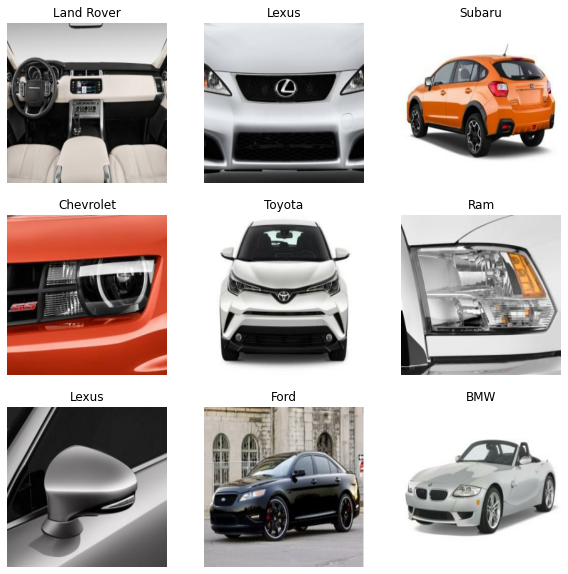

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
batch_size = 32
img_height = 256
img_width = 256

In [6]:
num_classes = len(class_names)

model = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [7]:
history = model.fit(
  train_data,
  validation_data=validation_data,
  epochs=10
)

Epoch 1/10
1612/1612 [==============================] - 953s 591ms/step - loss: 3.0759 - accuracy: 0.1814 - val_loss: 2.5865 - val_accuracy: 0.3252
Epoch 2/10
1612/1612 [==============================] - 951s 590ms/step - loss: 1.8843 - accuracy: 0.5017 - val_loss: 2.2210 - val_accuracy: 0.4908
Epoch 3/10
1612/1612 [==============================] - 968s 601ms/step - loss: 0.9747 - accuracy: 0.7276 - val_loss: 2.6390 - val_accuracy: 0.5242
Epoch 4/10
1612/1612 [==============================] - 968s 600ms/step - loss: 0.4997 - accuracy: 0.8513 - val_loss: 3.3665 - val_accuracy: 0.5232
Epoch 5/10
1612/1612 [==============================] - 931s 577ms/step - loss: 0.3127 - accuracy: 0.9062 - val_loss: 4.3255 - val_accuracy: 0.5425
Epoch 6/10
1612/1612 [==============================] - 915s 567ms/step - loss: 0.2316 - accuracy: 0.9331 - val_loss: 4.7505 - val_accuracy: 0.5387
Epoch 7/10
1612/1612 [==============================] - 901s 559ms/step - loss: 0.1869 - accuracy: 0.9476 - val_

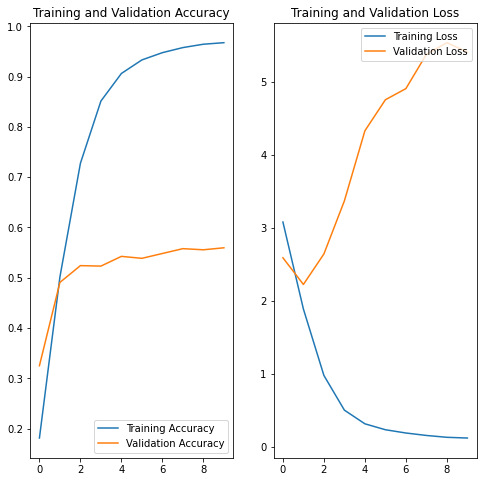

In [10]:
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Very overfit WIP

In [ ]:
car_url = ""
car_file = tf.keras.utils.get_file('', origin=car_url)

img = tf.keras.utils.load_img(
    car_file, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [ ]:
import os
if not os.path.exists('output'): os.mkdir('output')
save_path = os.path.join("output/1/")
tf.saved_model.save(model, save_path)

INFO:tensorflow:Assets written to: output/1/assets


INFO:tensorflow:Assets written to: output/1/assets
